In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import roc_auc_score,recall_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

from sklearn.model_selection import GridSearchCV

from mlxtend.classifier import StackingClassifier

from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
df=pd.read_csv('mushroom.csv')
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,target,capshape,capsurface,capcolor,bruises?,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,stalkroot,stalksurface abvring,stalksurface blwrng,stalkcolor abvring,stalkcolor blwrng,veil type,veil color,ring number,ring type,spore print color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


# EDA by sweetviz library

In [4]:
import sweetviz

In [5]:
df['target'].value_counts()

e    4208
p    3916
Name: target, dtype: int64

In [6]:
df['target']=df['target'].replace(['e','p'],[1,0])

In [7]:
my_report=sweetviz.analyze([df,'df'],target_feat='target')

:FEATURES DONE:                    |█████████████████████| [100%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:06  -> (00:00 left)


Creating Associations graph... DONE!


In [8]:
my_report.show_html('Salaryprediction.html')

Report Salaryprediction.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# General data checking

In [9]:
df['target'].value_counts()

1    4208
0    3916
Name: target, dtype: int64

In [10]:
df.shape

(8124, 23)

In [11]:
df.dtypes

target                   int64
capshape                object
capsurface              object
capcolor                object
bruises?                object
odor                    object
gillattachment          object
gillspacing             object
gillsize                object
gillcolor               object
stalkshape              object
stalkroot               object
stalksurface abvring    object
stalksurface blwrng     object
stalkcolor abvring      object
stalkcolor blwrng       object
veil type               object
veil color              object
ring number             object
ring type               object
spore print color       object
population              object
habitat                 object
dtype: object

In [12]:
df.describe()

,target
count,8124.000000
mean,0.517971
std,0.499708
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [13]:
df['capshape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: capshape, dtype: int64

<AxesSubplot:>

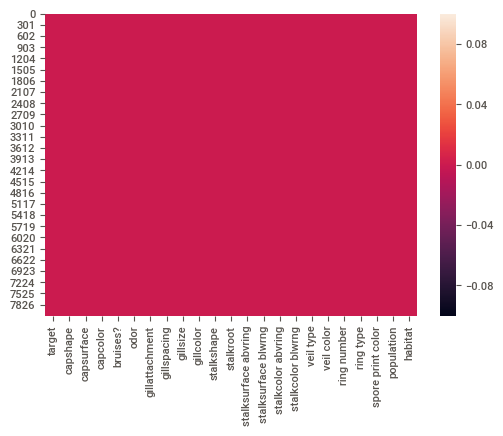

In [14]:
sns.heatmap(df.isnull())  

In [15]:
df.isnull().sum()

target                  0
capshape                0
capsurface              0
capcolor                0
bruises?                0
odor                    0
gillattachment          0
gillspacing             0
gillsize                0
gillcolor               0
stalkshape              0
stalkroot               0
stalksurface abvring    0
stalksurface blwrng     0
stalkcolor abvring      0
stalkcolor blwrng       0
veil type               0
veil color              0
ring number             0
ring type               0
spore print color       0
population              0
habitat                 0
dtype: int64

# EDA

<AxesSubplot:>

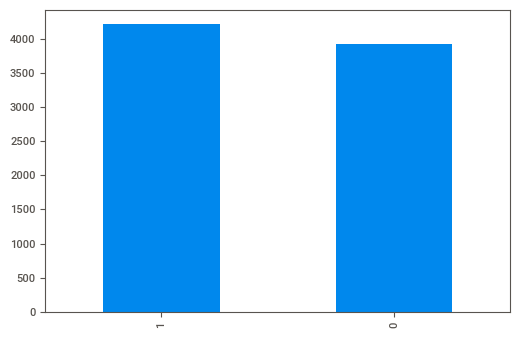

In [16]:
#checking for imbalanced dataset
df['target'].value_counts().plot.bar()

# Feature engineering

In [17]:
#Dummies can also be done,this is just to check out another method of converting categorical to numerical data type.
#this enumerate method preserves the ordinality in the form of highest numder of occurance to lowest.
#label encoder gives ordinality according to alphabet order.enumerate is better option than label encoder.
#This Enumerate code does it few line of codes where as label encoder takes one line code for each categorical feature.

#df=pd.get_dummies(df)----->is the best option as equal priority is given to all the categories in each categorical column.

In [18]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='object']

for feature in categorical_features:
    labels_sorted=df[feature].value_counts().sort_values().index
   
    labels_ordered={k:i for i,k in enumerate(labels_sorted,0)}
    df[feature]=df[feature].map(labels_ordered)

In [19]:
df.head()

,target,capshape,capsurface,capcolor,bruises?,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,stalkroot,stalksurface abvring,stalksurface blwrng,stalkcolor abvring,stalkcolor blwrng,veil type,veil color,ring number,ring type,spore print color,population,habitat
0,0,5,2,9,0,2,1,1,0,4,0,2,3,3,8,8,0,3,2,4,6,3,2
1,1,5,2,6,0,4,1,1,1,4,0,1,3,3,8,8,0,3,2,4,7,2,5
2,1,2,2,5,0,3,1,1,1,8,0,1,3,3,8,8,0,3,2,4,7,2,1
3,0,5,3,5,0,2,1,1,0,8,0,2,3,3,8,8,0,3,2,4,6,3,2
4,1,5,2,8,1,8,1,0,1,4,1,2,3,3,8,8,0,3,2,3,7,1,5


In [20]:
df.shape

(8124, 23)

In [21]:
df.skew()

target                 -0.071946
capshape               -1.129091
capsurface             -0.216238
capcolor               -0.872863
bruises?               -0.342750
odor                   -1.445828
gillattachment         -5.977076
gillspacing            -1.840088
gillsize               -0.825797
gillcolor              -0.826891
stalkshape             -0.271345
stalkroot              -1.116999
stalksurface abvring   -1.221199
stalksurface blwrng    -1.460533
stalkcolor abvring     -1.785206
stalkcolor blwrng      -1.786875
veil type               0.000000
veil color             -7.308220
ring number            -3.556463
ring type              -0.883442
spore print color      -1.234016
population             -1.345781
habitat                -1.210740
dtype: float64

# Segregating target and Independent variables

In [22]:
y=df[['target']]
X=df.drop(['target'],axis=1)

# Removing skewness by power transformation technique

In [23]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') # initally write code like this so you remember
x_power=pt.fit_transform(X)
x=pd.DataFrame(x_power,columns=X.columns)

In [24]:
x.skew()

capshape               -0.305731
capsurface             -0.175506
capcolor               -0.239378
bruises?               -0.342750
odor                   -0.656491
gillattachment         -5.977076
gillspacing            -1.840088
gillsize               -0.825797
gillcolor              -0.289066
stalkshape             -0.271345
stalkroot              -0.432705
stalksurface abvring   -0.635130
stalksurface blwrng    -0.631477
stalkcolor abvring     -0.708396
stalkcolor blwrng      -0.703286
veil type               0.000000
veil color             -6.136705
ring number            -3.140408
ring type              -0.318048
spore print color      -0.186888
population             -0.606971
habitat                -0.480505
dtype: float64

In [25]:
x.head()

,capshape,capsurface,capcolor,bruises?,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,stalkroot,stalksurface abvring,stalksurface blwrng,stalkcolor abvring,stalkcolor blwrng,veil type,veil color,ring number,ring type,spore print color,population,habitat
0,1.019291,-0.165715,1.230266,-1.185917,-1.888474,0.162896,0.438864,-1.494683,-1.652683,-1.144806,-1.248539,0.747556,0.780655,0.823501,0.832868,0.0,0.15887,0.291438,0.963799,-0.533414,-1.001843,-1.662287
1,1.019291,-0.165715,-0.882159,-1.185917,-1.536967,0.162896,0.438864,0.669038,-1.652683,-1.144806,-1.772360,0.747556,0.780655,0.823501,0.832868,0.0,0.15887,0.291438,0.963799,0.280216,-1.534471,0.068333
2,-1.916422,-0.165715,-1.358394,-1.185917,-1.760439,0.162896,0.438864,0.669038,-0.283941,-1.144806,-1.772360,0.747556,0.780655,0.823501,0.832868,0.0,0.15887,0.291438,0.963799,0.280216,-1.534471,-1.909319
3,1.019291,1.091706,-1.358394,-1.185917,-1.888474,0.162896,0.438864,-1.494683,-0.283941,-1.144806,-1.248539,0.747556,0.780655,0.823501,0.832868,0.0,0.15887,0.291438,0.963799,-0.533414,-1.001843,-1.662287
4,1.019291,-0.165715,0.405641,0.843230,0.933748,0.162896,-2.278612,0.669038,-1.652683,0.873511,-1.248539,0.747556,0.780655,0.823501,0.832868,0.0,0.15887,0.291438,-0.593435,0.280216,-1.846013,0.068333


# Scaling the data

In [26]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(data=x_scaled,columns=X.columns)


In [27]:
x.head()

,capshape,capsurface,capcolor,bruises?,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,stalkroot,stalksurface abvring,stalksurface blwrng,stalkcolor abvring,stalkcolor blwrng,veil type,veil color,ring number,ring type,spore print color,population,habitat
0,1.019291,-0.165715,1.230266,-1.185917,-1.888474,0.162896,0.438864,-1.494683,-1.652683,-1.144806,-1.248539,0.747556,0.780655,0.823501,0.832868,0.0,0.15887,0.291438,0.963799,-0.533414,-1.001843,-1.662287
1,1.019291,-0.165715,-0.882159,-1.185917,-1.536967,0.162896,0.438864,0.669038,-1.652683,-1.144806,-1.772360,0.747556,0.780655,0.823501,0.832868,0.0,0.15887,0.291438,0.963799,0.280216,-1.534471,0.068333
2,-1.916422,-0.165715,-1.358394,-1.185917,-1.760439,0.162896,0.438864,0.669038,-0.283941,-1.144806,-1.772360,0.747556,0.780655,0.823501,0.832868,0.0,0.15887,0.291438,0.963799,0.280216,-1.534471,-1.909319
3,1.019291,1.091706,-1.358394,-1.185917,-1.888474,0.162896,0.438864,-1.494683,-0.283941,-1.144806,-1.248539,0.747556,0.780655,0.823501,0.832868,0.0,0.15887,0.291438,0.963799,-0.533414,-1.001843,-1.662287
4,1.019291,-0.165715,0.405641,0.843230,0.933748,0.162896,-2.278612,0.669038,-1.652683,0.873511,-1.248539,0.747556,0.780655,0.823501,0.832868,0.0,0.15887,0.291438,-0.593435,0.280216,-1.846013,0.068333


# Applying algorithm

In [28]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [30]:
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
xgb=XGBClassifier()

In [31]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('XGBClassifier',xgb))

In [32]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score,roc_auc_score

***************** KNeighborsClassifier *******************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score  - 1.0


cross_val_score  - 0.9602423928061722


roc_auc_score  - 1.0


Recall_score  - 1.0


classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       979
           1       1.00      1.00      1.00      1052

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



[[ 979    0]
 [   0 1052]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** SVC *******************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=

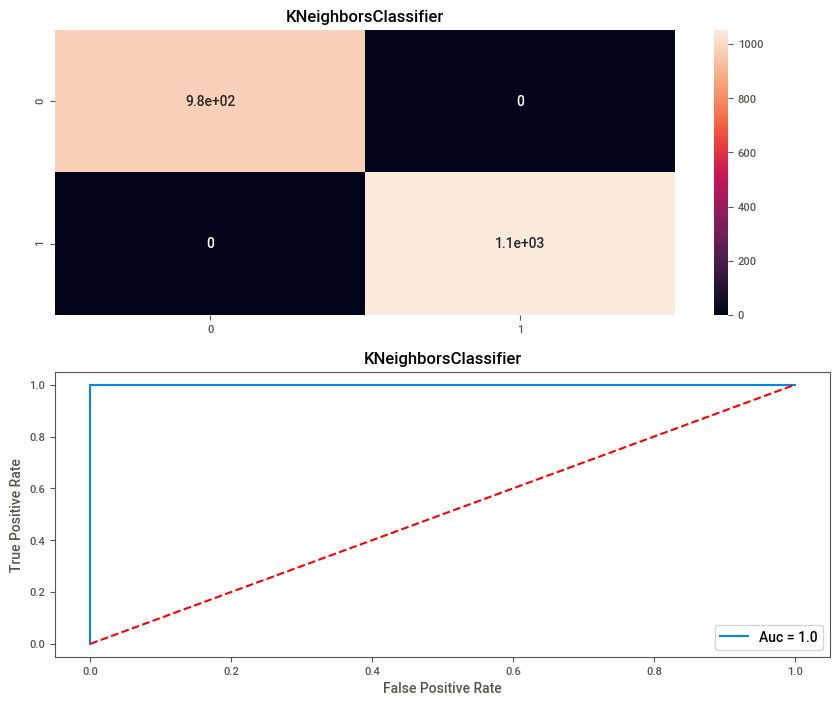

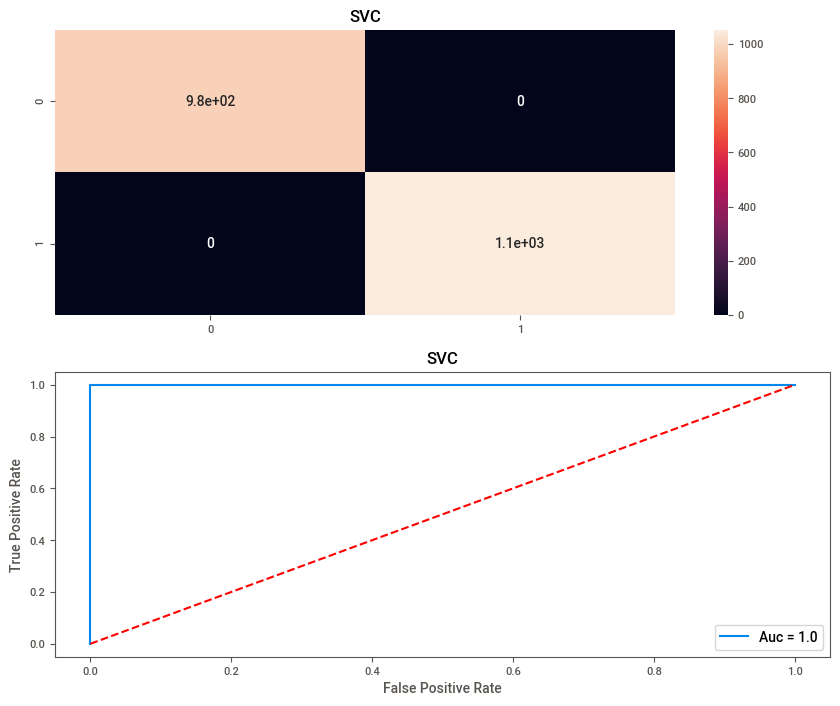

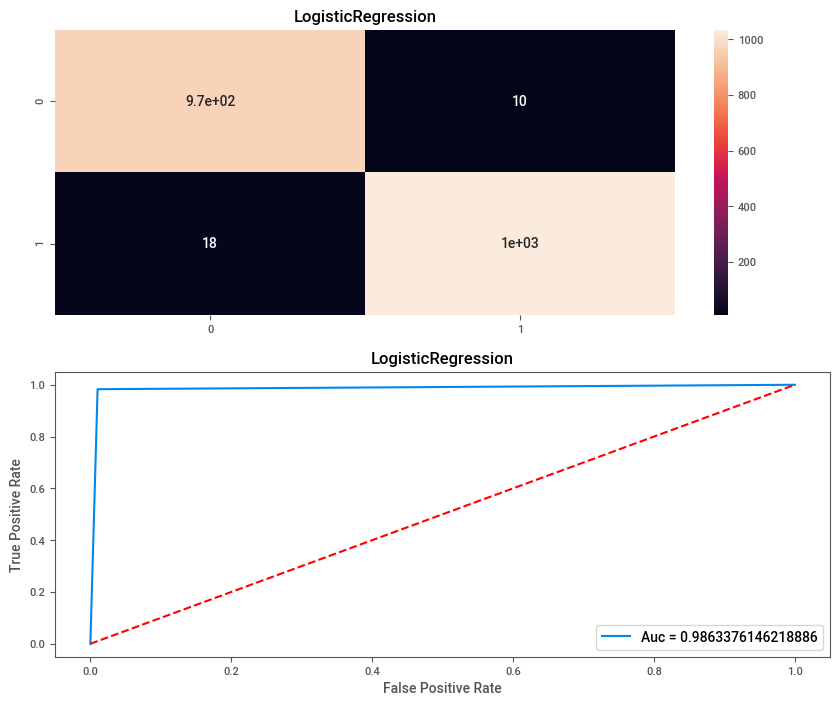

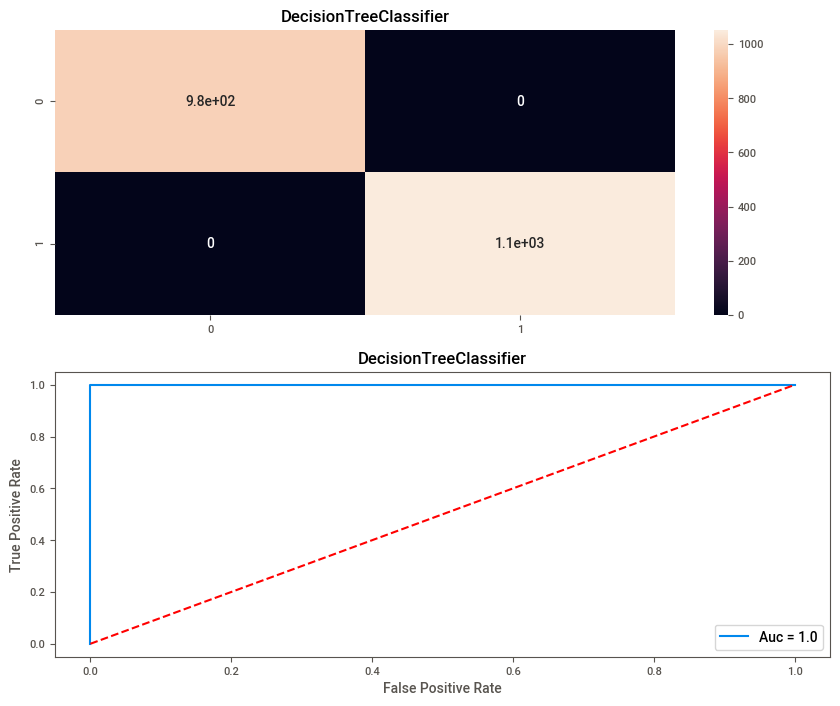

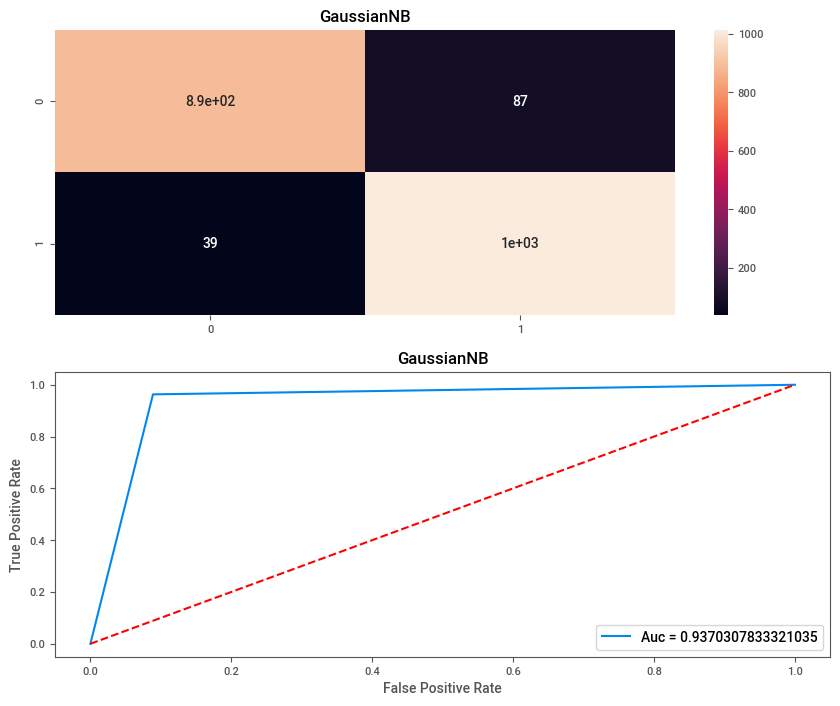

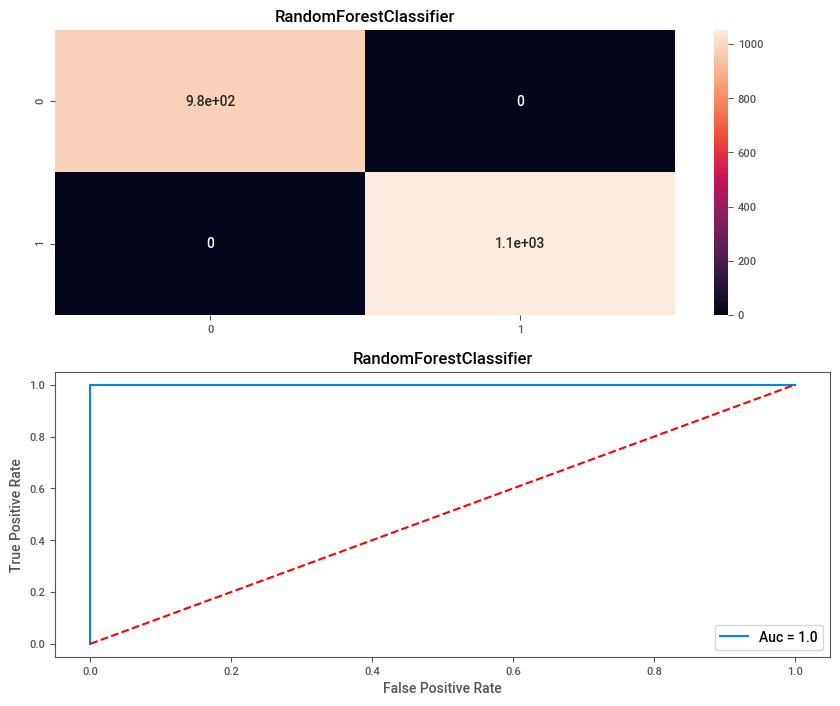

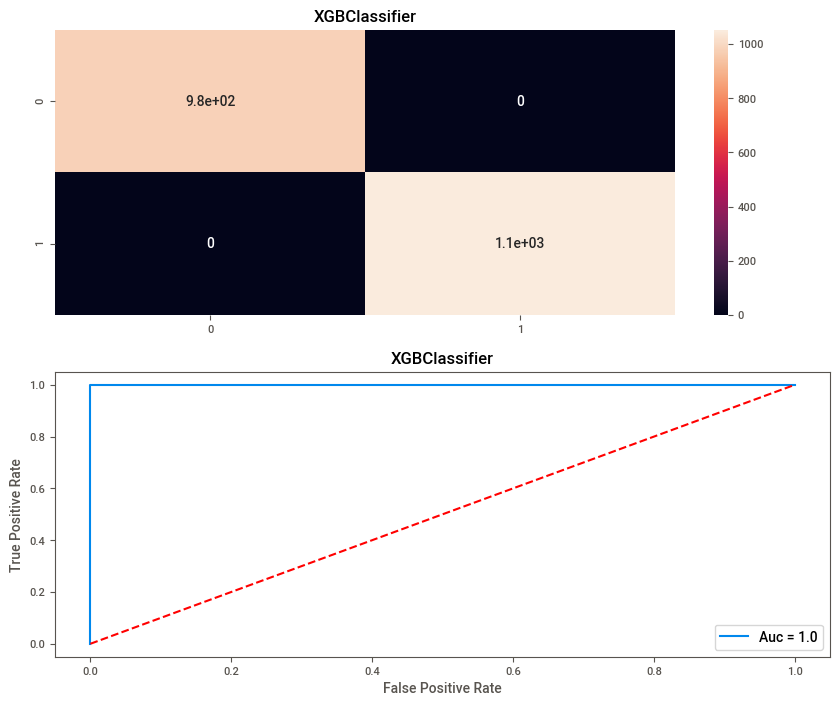

In [33]:
Model=[]
score=[]
cv=[]
rocscore=[]
recall=[]
for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    fpr,tpr,threshold=roc_curve(y_test,pre)
    roc_auc=auc(fpr,tpr)
    print('roc_auc_score  -',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    re=recall_score(y_test,pre)
    print('Recall_score  -',re)
    recall.append(re*100)
    print('\n')
    
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr,tpr,label='Auc = ' +str(roc_auc))
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
    
    
    

In [34]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Recall_score':recall,'Cross_val_score':cv,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Recall_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,100.000000,100.000000,96.024239,100.000000
1,SVC,100.000000,100.000000,96.308628,100.000000
2,LogisticRegression,98.621369,98.288973,95.393126,98.633761
3,DecisionTreeClassifier,100.000000,100.000000,98.594389,100.000000
4,GaussianNB,93.796160,96.292776,92.172830,93.703078
5,RandomForestClassifier,100.000000,100.000000,96.703203,100.000000
6,XGBClassifier,100.000000,100.000000,96.851169,100.000000


In [35]:
#hence XGBClassifier is the best performing Algorithm for the taken dataset.
#As recall_score & roc_auc_score is 100,we are not finding anymore random_state.random_state=42 is working best 
#not doing gridsearchcv

# saving the final XGBClassifier model

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)
print('recall_score=  ',recall_score(y_test,pred))
print('roc_score='     ,roc_auc_score(y_test,pred))

recall_score=   1.0
roc_score= 1.0


In [37]:
#Cross validating the model and checking the cross_val_score.
from sklearn.model_selection import cross_val_predict
xgb=XGBClassifier()
xgb.fit(x,y)
cvs=cross_val_score(xgb,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,x,y,cv=10)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.9685116851168513


array([[3660,    0],
       [ 256, 4208]], dtype=int64)

In [39]:
from sklearn.externals import joblib
joblib.dump(xgb,'mushroomenumerate_xgb_classification.obj')

['mushroomenumerate_xgb_classification.obj']

In [40]:
model=joblib.load('mushroomenumerate_xgb_classification.obj')

In [42]:
final_predictions=model.predict(x_test)
final_predictions=pd.DataFrame(final_predictions,columns=['target'])

In [43]:
final_predictions.sample(n=10)

,target
94,0
120,0
1312,0
1994,1
72,0
1676,0
480,1
1256,1
73,1
1624,1


# Saving final predictions in file.csv 

In [44]:
final_predictions.to_csv('E:\\final_predictionmushroom.csv',index=False)

# Conclusion:-